1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

sigma = 2.9


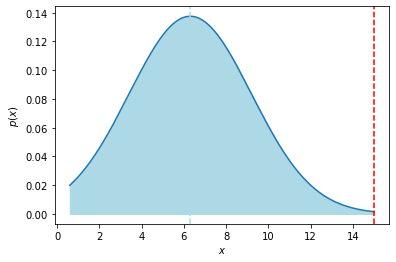

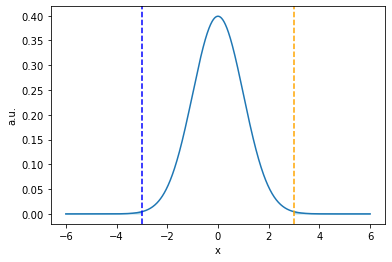

p-value = 0.0026997960632601965


In [1]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy import stats
from scipy.stats import poisson

x0 = 15.
mu = 6.3
Z = 3

# Determine sigma
sigma = abs(x0 - mu) / Z
print("sigma =", sigma)

#Plot the measurement and its assumed pdf
w = mu - x0
x = np.linspace(mu - w, w + mu + 3, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y)
plt.fill_between(x, y, where=np.abs(x - mu) > w, color='lightblue')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

#Plotting second graph
xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

#Calculate the p-value
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -3.786997938137629


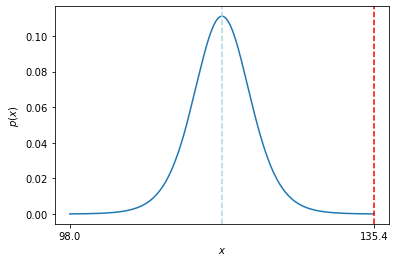

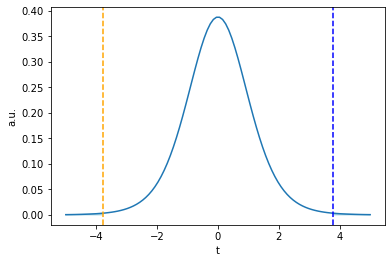

p-value = 0.004302464132864604


In [2]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])#Input data

sigma1 = np.sqrt(np.var(pre, ddof=1)) #Calculating variance and sqrt()
sigma2 = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((sigma1**2+sigma2**2)/2)

pre_mean = np.mean(pre) #Mean of the sample
post_mean = np.mean(post)

n = len(post) #Size of the data sample
w = pre_mean - post_mean

#Calculatetest statistics
T = (pre_mean - post_mean) / (sigma * np.sqrt(2/n))
print("T =", T)

#Plotting graph
x = np.linspace(pre_mean - w, w + pre_mean, 1000)
y = stats.t.pdf(x, loc=pre_mean, scale=sigma / np.sqrt(len(post)), df=len(post) - 1)
plt.plot(x, y)
plt.axvline(post_mean, linestyle='--', color='red')
plt.axvline(pre_mean, linestyle='--', color='lightblue')
plt.xticks([pre_mean - w, pre_mean + w], [pre_mean - w, pre_mean + w])
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

#Plotting graph
xs = np.linspace(-5, +5, 100)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

#Calculating p-value
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

Peak frequency: 2.0


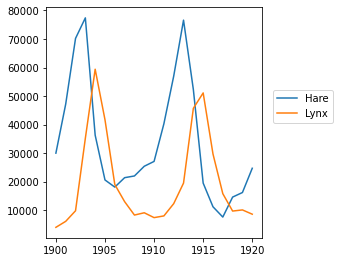

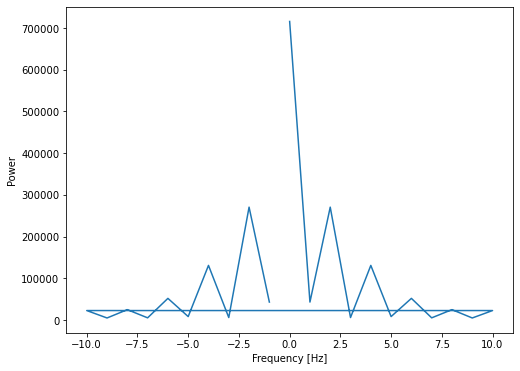

In [3]:
from scipy import fftpack

#Extracting data
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T

#Plotting graph
plt.axes([0.2, 0.1, 0.5, 0.8])
plt.plot(year, hares, year, lynxes)
plt.legend(('Hare', 'Lynx'), loc = (1.05, 0.5))

sig_fft = fftpack.fft(hares)
power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(len(hares), d=1/len(hares))

#Plotting graph
plt.figure(figsize=(8, 6))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')


pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
powes = power[pos_mask]
#Find the max of freqs array
peak_freq = freqs[powes.argmax()]
print("Peak frequency:", peak_freq)

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Reconstructed Image')

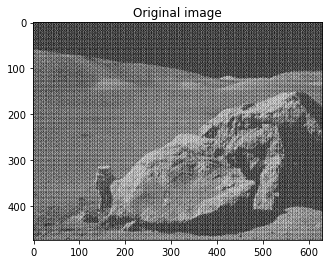

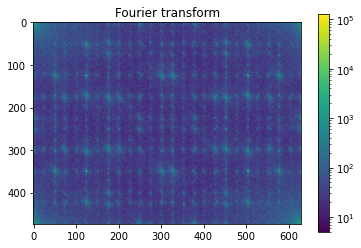

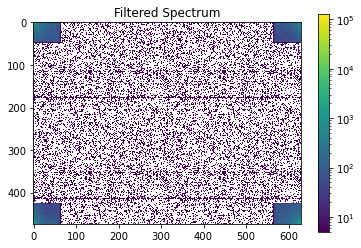

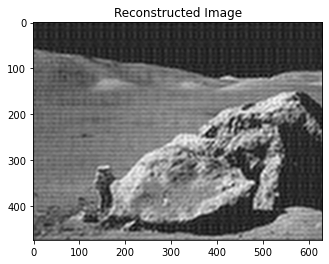

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.fftpack as fp
from matplotlib.colors import LogNorm

#Original image
im = plt.imread("moonlanding.png").astype(float)

plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

im_fft = fftpack.fft2(im)


def plot_spectrum(im_fft):
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

#Showing image spectrum
plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

keep_fraction = 0.1

im_fft2 = im_fft.copy()

r, c = im_fft2.shape

im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

#Showing image filtered spectrum
plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

im_new = fftpack.ifft2(im_fft2).real

#Showing filtered image
plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')